In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
os.getcwd()

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

import numpy as np
import keras 
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import to_categorical
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


from numpy import genfromtxt

C:\Users\Marakhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [106]:
im=cv2.imread('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\0\\car.jpg',1)

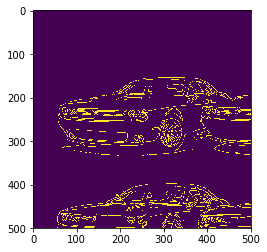

In [127]:
edges = cv2.Canny(im[:500,:500,:],-100,150)
plt.imshow(edges)

TypeError: Image data cannot be converted to float

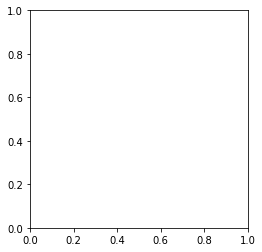

In [18]:
plt.imshow(im)

In [40]:
y_train = np.zeros(186*2)
y_train = np.concatenate((y_train, np.ones(192*2)), axis=None)
y_train.astype(np.uint8)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [2]:
for i in range(0,220,1):
    file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\'+str(i)+'\\img.PNG'
    im = cv2.imread(file_name)
    edges = cv2.Canny(im,100,200)
    cv2.imwrite('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\'+str(i)+'\\edges.PNG', edges) 

In [11]:
k = 0
for i in range(0,220,1):
    file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\'+str(i)+'\\edges.PNG'
    file_name1 = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\'+str(i)+'\\img.PNG'
    im = cv2.imread(file_name)
    im = im[:,:,0].ravel()
    im1 = cv2.imread(file_name1)
    #print(file_name)
    #plt.imshow(im)
    #imshow(im)
    if k==0:
        y_train=np.expand_dims(im, axis=0)
        x_train=np.expand_dims(im1, axis=0)
        k = k+1
    else:
        y_train = np.concatenate((y_train, np.expand_dims(im, axis=0)), axis=0) 
        x_train = np.concatenate((x_train, np.expand_dims(im1, axis=0)), axis=0)
print(y_train.shape)
print(x_train.shape)

(220, 1225)
(220, 35, 35, 3)


In [12]:
#imshow(y_train[219])
y_train1 = (y_train/128).astype(int)
#y_train2 = y_train1[:].ravel()
#print(y_train[][600:1200]/128)
print(y_train1[0][:].reshape(35,35)[5:25,5:25])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [13]:
X_input = Input(x_train.shape[1:])

X = ZeroPadding2D((3, 3))(X_input)

X = Conv2D(16, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)

X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv1')(X)
X = BatchNormalization(axis = 3, name = 'bn1')(X)
X = Activation('relu')(X)

X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv110')(X)
X = BatchNormalization(axis = 3, name = 'bn110')(X)
s1 = Activation('relu')(X)

X = MaxPooling2D((2, 2), name='max_pool1')(s1)

X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv2')(X)
X = BatchNormalization(axis = 3, name = 'bn2')(X)
X = Activation('relu')(X)

X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv3')(X)
X = BatchNormalization(axis = 3, name = 'bn3')(X)
X = Activation('relu')(X)

# X = MaxPooling2D((2, 2), name='max_pool2')(s2)

X = Conv2D(128, (3, 3), strides = (1, 1), name = 'conv4')(X)
X = BatchNormalization(axis = 3, name = 'bn4')(X)
s2 = Activation('relu')(X)

X = Conv2D(128, (5, 5), strides = (1, 1), name = 'conv5')(s2)
X = BatchNormalization(axis = 3, name = 'bn5')(X)
X = Activation('relu')(X)

X = Conv2D(256, (3, 3), strides = (1, 1), name = 'conv6')(X)
X = BatchNormalization(axis = 3, name = 'bn6')(X)
X = Activation('relu')(X)

# X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv7')(s4)
# X = BatchNormalization(axis = 3, name = 'bn7')(X)
# X = Activation('relu')(X)

# X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv8')(X)
# X = BatchNormalization(axis = 3, name = 'bn8')(X)
# s5 = Activation('relu')(X)

# X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv9')(s5)
# X = BatchNormalization(axis = 3, name = 'bn9')(X)
# X = Activation('relu')(X)

# X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv10')(X)
# X = BatchNormalization(axis = 3, name = 'bn10')(X)
# s6 = Activation('relu')(X)

# X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv11')(s6)
# X = BatchNormalization(axis = 3, name = 'bn11')(X)
# X = Activation('relu')(X)

# X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv12')(X)
# X = BatchNormalization(axis = 3, name = 'bn12')(X)
# s7 = Activation('relu')(X)

X = Conv2DTranspose(16, (5, 5), strides = (1, 1), name = 'deconv_1')(s1)
X = BatchNormalization(axis = 3, name = 'bn13')(X)
m1 = Activation('relu')(X)

X = Conv2DTranspose(32, (14, 14), strides = (1, 1), name = 'deconv_2')(s2)
X = BatchNormalization(axis = 3, name = 'bn14')(X)
m2 = Activation('relu')(X)

X = Conv2DTranspose(32, (16, 16), strides = (1, 1), name = 'deconv_3')(m2)
X = BatchNormalization(axis = 3, name = 'bn15')(X)
m3 = Activation('relu')(X)

m = concatenate([m1, m3, X_input])

final1 = Conv2D(1, (1, 1), strides = (1, 1), name = 'final')(m)
final = Activation('sigmoid')(final1)

Y = Flatten()(final)
# Y = Dense(1225, activation='sigmoid', name='fc')(Y)

model = Model(inputs = X_input, outputs = Y, name='HappyModel')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 35, 35, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 41, 41, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 39, 39, 16)   448         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (BatchNormalization)        (None, 39, 39, 16)   64          conv0[0][0]                      
__________________________________________________________________________________________________
activation

In [70]:
#model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train[0:210], y_train1[0:210], epochs=10, batch_size=8)

Epoch 1/10
210/210 [==============================] - 21s 101ms/step - loss: 0.0149 - acc: 0.9945
Epoch 2/10
210/210 [==============================] - 21s 99ms/step - loss: 0.0121 - acc: 0.9957
Epoch 3/10
210/210 [==============================] - 21s 100ms/step - loss: 0.0115 - acc: 0.9960
Epoch 4/10
210/210 [==============================] - 21s 100ms/step - loss: 0.0105 - acc: 0.9964
Epoch 5/10
210/210 [==============================] - 21s 100ms/step - loss: 0.0105 - acc: 0.9964
Epoch 6/10
210/210 [==============================] - 21s 100ms/step - loss: 0.0092 - acc: 0.9970
Epoch 7/10
210/210 [==============================] - 21s 100ms/step - loss: 0.0092 - acc: 0.9968
Epoch 8/10
210/210 [==============================] - 21s 100ms/step - loss: 0.0078 - acc: 0.9976
Epoch 9/10
210/210 [==============================] - 22s 103ms/step - loss: 0.0066 - acc: 0.9980
Epoch 10/10
210/210 [==============================] - 21s 101ms/step - loss: 0.0073 - acc: 0.9978


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 1 1 1 0 0 0 0 0 0 0]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   

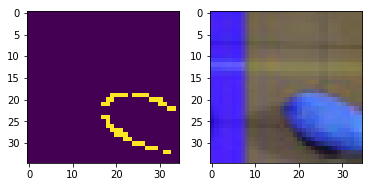

In [80]:
x = image.img_to_array(x_train[219])
x = np.expand_dims(x, axis=0)
mark_y=model.predict(x)
# print(np.array(mark_y).reshape(35,35)[20:,:20])
#print(y_train[0][20:,:20])
A = np.array(mark_y)
A[A > 0.5] = 1
A[A <= 0.5] = 0
print(A.astype(int).reshape(35,35)[0:20,20:])
#print(np.array(mark_y)[0,600:1200])
print(y_train[211].reshape(35,35)[0:20,20:])
A = A.astype(int).reshape(35,35)*255
print(type(A))
# kernel = np.ones((5,5),np.uint8)
# B = cv2.dilate(np.float32(A),kernel,iterations = 2)
# C = cv2.erode(B,kernel,iterations = 2)
plt.subplot(121),plt.imshow(A)
plt.subplot(122),plt.imshow(x_train[219])
# plt.subplot(143),plt.imshow(B)
# plt.subplot(144),plt.imshow(C)
plt.show()



In [ ]:
cv2.imwrite('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\segmentation\\peanut\\'+211+'\\erode.PNG', A) 